# Тема 01. Работа с табличными данными. EDA
Большое количество данных, которые используются в машинном обучении, представлены в виде таблиц, где в столбцах представлены различные признаки и целевые переменные. 
Для работы с такими данными в Python есть замечательная библиотека [`pandas`](https://pandas.pydata.org/docs/user_guide/index.html). К пандам отношения не имеет, название пошло от "панельные данные".


## Создание и индексация
В `pandas` два основных вида объектов (типов) Series и Dataframe, они похожи между собой, но Dataframe это фактически таблица, в которой есть строки, столбцы, а Series это один столбец со строками.
Столбцы и\или строки могут иметь названия, которые выступают их индексами и к определенному столбцу (или строке) можно обращаться именно по названию.  

Создадим Series (давайте назовем это последовательностью), в которой будут записаны некоторые данные имеющие названия (индексы). И данные (data) и индексы (index) могут иметь различный тип: числа, строки, объекты.

Но будьте аккуратны, индексы надо делать так, чтобы было понятно. Ниже увидим примеры разрешенных, но совершенно не понятных индексов. 

In [ ]:
import pandas as pd # подключим библиотеку
import numpy as np

### Series

In [ ]:
s = pd.Series(data=[10, "11", ['a',12], 'ppp', 14], # данные
              index=[2, '2', 'два', 2, -2]) # их индексы
s # здесь 5 ячеек 

2           10
2           11
два    [a, 12]
2          ppp
-2          14
dtype: object

в этой последовательности 5 ячеек (data) и к ним можно обратиться по индексам (index), важно понять, что здесь индексы именно названия, а не номера строк. 

In [ ]:
print(s[2]) # здесь вернется подпоследовательность элементов у которых индекс называется 2 (первая и четвертая ячейки)
print(s['2']) # это ячейка с названием '2', это совершенно другой индекс, отличается от названия 2 (вторая ячейка)
print(s['два']) # это ячейка с названием 'два', третья ячейка, в которой записан массив
print(s[-2]) # это ячейка с названием -2, пятая ячейка

2     10
2    ppp
dtype: object
11
['a', 12]
14


Как и в numpy можно делать срезы, в этом случае указываются номера, а не названия элементов.

In [ ]:
s[1:3] # срез, вторая и третья ячейки, здесь это номера, а не названия.

2           11
два    [a, 12]
dtype: object

Но срезы могут быть строковыми (удивительно), тогда это именно названия. Pandas сопоставит символьные индексы числовым, найдет их в последовательности, и вернет все, что между ними, включая границы. 

In [ ]:
v = pd.Series(data=[10, "11", ['a',12], 'ppp', 14], # данные
              index=['a', 'f', 'c', 'd', 'e']) # их индексы
v['a':'d']
# v['a':'g'] # так работать не будет, потому что индекса 'g' нет. 

a         10
f         11
c    [a, 12]
d        ppp
dtype: object

Создай свои последовательности, обратись к элементам. Проверь, что будет если при создании последовательности не указать index?  А если при строковом индексе в последовательности индексы будут повторяться? 

### Dataframe

Аналогично можно создать таблицу Dataframe, в которой несколько столбцов. 

In [ ]:
s = pd.Series(data=[123, 456, 789])
s

0    123
1    456
2    789
dtype: int64

In [ ]:
df = pd.DataFrame([[10, 'aaa'], [s, 21], [30, 31]])
df

,0,1
0,10,aaa
1,0 123 1 456 2 789 dtype: int64,21
2,30,31


здесь два столбца, три строки, названия их сделаны по умолчанию, в одну ячейку мы записали последовательность s. 
Столбцы (columns) и строки (index) можно назвать.


In [ ]:
df = pd.DataFrame([[10, 'aaa'], [s, 21], [30, 31]],
                  columns=['невторой',2],
                  index=[1,'1','один'])
df

,невторой,2
1,10,aaa
1,0 123 1 456 2 789 dtype: int64,21
один,30,31


При индексации по названию сначала указываем название столбца - вернется весь столбец в виде последовательности - потом для нее указываем название строки.

In [ ]:
s1=df['невторой']['один']
s1

30

Названия столбцов содержатся в атрибуте columns и их можно изменять.

В некоторых случаях к столбцу можно обратиться как к атрибуту через знак "." Но это работает не всегда.
Попробуйте назвать столбец "столбец 1" или 'index' или "1" и посмотрите, что получится. 

In [ ]:
# df.columns=['столбец 1',2] # изменяем названия столбцов
df.columns=['невторой','second']
# df.columns=['index','second']
df

,невторой,second
1,10,aaa
1,0 123 1 456 2 789 dtype: int64,21
один,30,31


In [ ]:
df.невторой # работает, название столбца как атрибут

1                                            10
1       0    123
1    456
2    789
dtype: int64
один                                         30
Name: невторой, dtype: object

In [ ]:
#  а вот с такими названиями работать не будет 
df.столбец 1  
df.'столбец 1'

SyntaxError: ignored

In [ ]:
# так ошибку не выдает, но выдает что-то не то. Это потому, что index уже определен как атрибут
df.index

Index([1, '1', 'один'], dtype='object')

Атрибут index возвращает индекс (названия строк)

Атрибут columns возвращает названия столбцов (для таблиц)

Атрибут values возвращает значения ячеек как массив numpy

In [ ]:
print(df.index)
print(df.columns)
print(df.values)
print(type(df.values))

Index([1, '1', 'один'], dtype='object')
Index(['невторой', 'second'], dtype='object')
[[10 'aaa']
 [2           10
2           11
два    [a, 12]
2          ppp
-2          14
dtype: object
  21]
 [30 31]]
<class 'numpy.ndarray'>


Срез выполняется по строкам

In [ ]:
df[0:2]

,невторой,second
1,10,aaa
1,"2 10 2 11 два [a, 12] 2...",21


Если нужно обращаться по номеру (числовому индексу), используем атрибут iloc, как если бы это был массив numpy. (Сначала строки, потом столбцы)

In [ ]:
# df.iloc[0, 1]
# df.iloc[1,:]

Индексация может быть логической, истинные элементы (True) отбираются, ложные (False) отбрасываются. 

In [ ]:
np.random.seed(123)
s = pd.Series(np.random.normal(size=10))
print(s)
ind=s>0
print(ind)
r=s[ind]
print(r)

0   -1.085631
1    0.997345
2    0.282978
3   -1.506295
4   -0.578600
5    1.651437
6   -2.426679
7   -0.428913
8    1.265936
9   -0.866740
dtype: float64
0    False
1     True
2     True
3    False
4    False
5     True
6    False
7    False
8     True
9    False
dtype: bool
1    0.997345
2    0.282978
5    1.651437
8    1.265936
dtype: float64


## Загрузка из файла

Если б таблички нужно было создавать вручную, это было бы слишком утомительно, к счастью, pandas обладает богатыми возможностями по загрузке файлов таблиц разного формата, \*.csv, \*.xls и других, как с диска так и из Интернет.

Команда [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) позволяет загрузить файлы csv с заданного файла на диске или адреса в Интернет (первый обязательный аргумент `filepath_or_buffer`). Это текстовые файлы, в которых столбцы таблиц разделяются некоторым символом (запятая, точка с запятой или другие), который можно указать команде (аргумент `sep`), возвращается объект типа Dataframe. У команды большие возможности по загрузке данных, можно ограничить количество загружаемых строк (аргумент `nrows`), можно указать загружаемые столбцы (аргумент `usecols`), указать, что делать со строками с пропущенными значениями и другие. 

In [ ]:
!git clone https://github.com/ViktorVlasov/ML_COURSE

Cloning into 'ML_COURSE'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


Будем рассматривать основные методы в деле, анализируя [набор данных по ценам на жилье в России](https://www.kaggle.com/c/sberbank-russian-housing-market/overview/description)

Прочитаем данные (метод read_csv) и посмотрим на первые 5 строк с помощью метода head:

In [ ]:
df = pd.read_csv('/content/ML_COURSE/data/lesson 1/sberbank/train.csv')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Посмотрим на размер данных, названия признаков и их типы.



In [ ]:
print(df.shape) # сколько строк и столбцов?

(30471, 292)


In [ ]:
print(df.columns) # как называются столбцы?

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=292)


In [ ]:
print(df.info()) # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB
None


float64(119), int64(157), object(16) - это типы признаков, в скобках указаны количества признаков с данным типом данных

In [ ]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Изменить тип колонки можно с помощью метода astype. Применим этот метод к признаку timestamp и переведём его в datetime64:

In [67]:
df['timestamp'] = df['timestamp'].astype('datetime64')
df.iloc[:, :3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         30471 non-null  int64         
 1   timestamp  30471 non-null  datetime64[ns]
 2   full_sq    30471 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 714.3 KB


## Индексация и извлечение данных


## Exploratory data analysis (разведочный анализ данных)

###1. Отсутствующие данные
Работа с отсутствующими значениями – одна из самых сложных, но и самых распространенных проблем очистки. Большинство моделей не предполагают пропусков.

1.1. Как обнаружить?
Рассмотрим несколько методов обнаружения пропусков.

1.1.1. Сводка с помощью функции info()  
Когда не очень много признаков.

In [70]:
df.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          30471 non-null  int64         
 1   timestamp   30471 non-null  datetime64[ns]
 2   full_sq     30471 non-null  int64         
 3   life_sq     24088 non-null  float64       
 4   floor       30304 non-null  float64       
 5   max_floor   20899 non-null  float64       
 6   material    20899 non-null  float64       
 7   build_year  16866 non-null  float64       
 8   num_room    20899 non-null  float64       
 9   kitch_sq    20899 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 2.3 MB


1.1.2. Процентный список пропущенных данных

Если в наборе много признаков и info() не выводит список признаков, можно составить список долей отсутствующих записей для каждого признака.



In [82]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing != 0:
        print('{} - {}%'.format(col, round(pct_missing*100, 2)))


life_sq - 20.95%
floor - 0.55%
max_floor - 31.41%
material - 31.41%
build_year - 44.65%
num_room - 31.41%
kitch_sq - 31.41%
state - 44.5%
preschool_quota - 21.95%
school_quota - 21.94%
hospital_beds_raion - 47.39%
raion_build_count_with_material_info - 16.38%
build_count_block - 16.38%
build_count_wood - 16.38%
build_count_frame - 16.38%
build_count_brick - 16.38%
build_count_monolith - 16.38%
build_count_panel - 16.38%
build_count_foam - 16.38%
build_count_slag - 16.38%
build_count_mix - 16.38%
raion_build_count_with_builddate_info - 16.38%
build_count_before_1920 - 16.38%
build_count_1921-1945 - 16.38%
build_count_1946-1970 - 16.38%
build_count_1971-1995 - 16.38%
build_count_after_1995 - 16.38%
metro_min_walk - 0.08%
metro_km_walk - 0.08%
railroad_station_walk_km - 0.08%
railroad_station_walk_min - 0.08%
ID_railroad_station_walk - 0.08%
cafe_sum_500_min_price_avg - 43.59%
cafe_sum_500_max_price_avg - 43.59%
cafe_avg_price_500 - 43.59%
cafe_sum_1000_min_price_avg - 21.41%
cafe_sum_100

1.1.3. Тепловая карта пропущенных значений  
Когда признаков в наборе не очень много, визуализируйте пропущенные значения с помощью тепловой карты. Так же этот метод можно использовать в совокупности с предыдущим.

In [84]:
import seaborn as sns

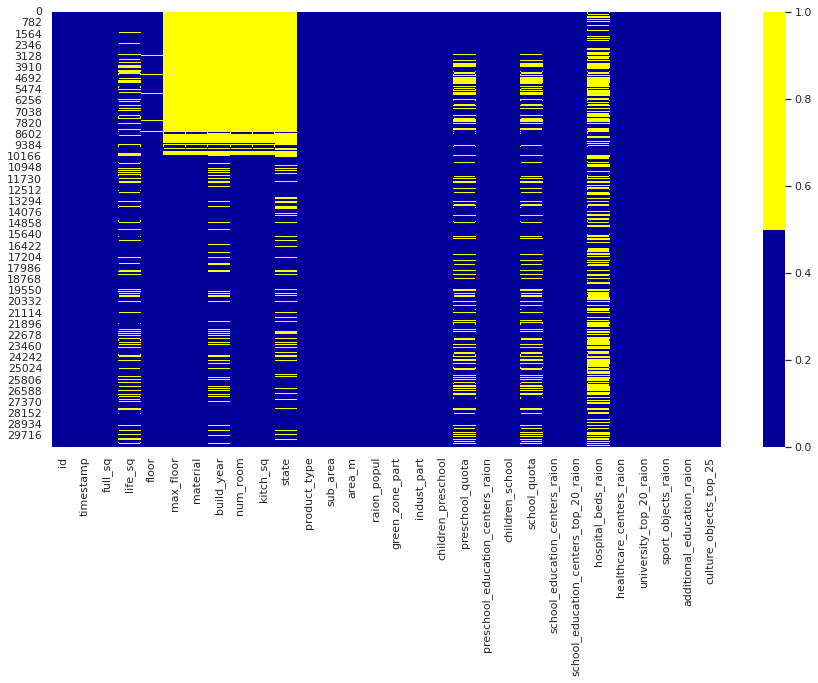

In [86]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

1.2. Что делать с пропущенными значениями?  

Не существует общих решений для проблемы отсутствующих данных. Для каждого конкретного набора приходится искать наиболее подходящие методы или их комбинации.

Разберем три самых распространенных техники.

1.2.1. Отбрасывание признаков  
Отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак hospital_beds_raion имеет высокий процент недостающих значений – 47%. Мы можем полностью отказаться от этого признака:

In [88]:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

1.2.3. Внесение недостающих значений  
Для численных признаков можно воспользоваться методом принудительного заполнения пропусков. Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

Возьмем для примера признак life_sq и заменим все недостающие значения медианой этого признака:

In [89]:
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


Одну и ту же стратегию принудительного заполнения можно применить сразу для всех числовых признаков:



In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

К счастью, в нашем наборе не нашлось пропусков в категориальных признаках. Но это не мешает нам продемонстрировать использование той же стратегии:

С помощью функции unique() можно посмотреть уникальные значения классов в категориальной переменной.  
С помощью функции value_counts() можно посмотреть количество уникальных значений классов в переменной.

Идея заполнения пропусков в категориальных данных заключается в следующем: Мы будет заполнять данные самым популярным значением.

In [ ]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

1.2.3. Замена недостающих значений  

Можно использовать некоторый дефолтный плейсхолдер для пропусков, например, новую категорию \_MISSING\_ для категориальных признаков или число -999 для числовых.

Таким образом, мы сохраняем данные о пропущенных значениях, что тоже может быть ценной информацией.

In [ ]:
# категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# численные признаки
df['life_sq'] = df['life_sq'].fillna(-999)